## Speech / Music Classification

#### Classification of sound files into either speech or music using a KNN algorithm as well as an ANN and comparing the results of both implementations

## Importing the data

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy.fftpack

from sklearn.neural_network import MLPClassifier

import IPython.display as ipd


get a sound file and music file for demonstration

In [2]:
speech_file = "./Speech_1/84-121123-0000.flac"
music_file = "./Music_1/000002.wav"

Load the audio as a waveform `y`
Store the sampling rate as `sr`

In [3]:
y_speech, sr_speech = librosa.load(speech_file)
y_music, sr_music = librosa.load(music_file)

In [4]:
ipd.Audio(y_speech, rate = sr_speech)

In [5]:
ipd.Audio(y_music, rate = sr_music)

## Extracting and Plotting Features

Plot the waveform

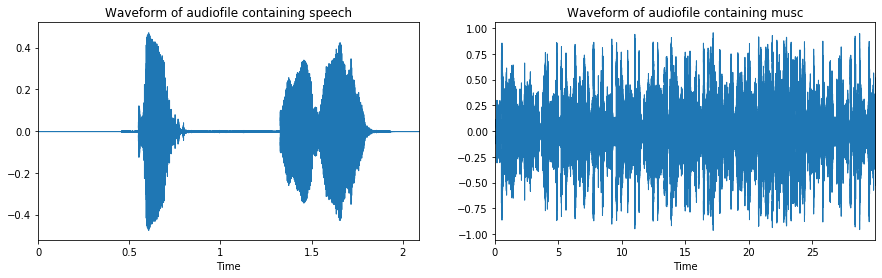

In [6]:
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
arr = librosa.display.waveplot(y_speech, sr=sr_speech)
plt.title("Waveform of audiofile containing speech");

plt.subplot(1,2,2)
librosa.display.waveplot(y_music, sr=sr_music)
plt.title("Waveform of audiofile containing musc");

### Spectogram

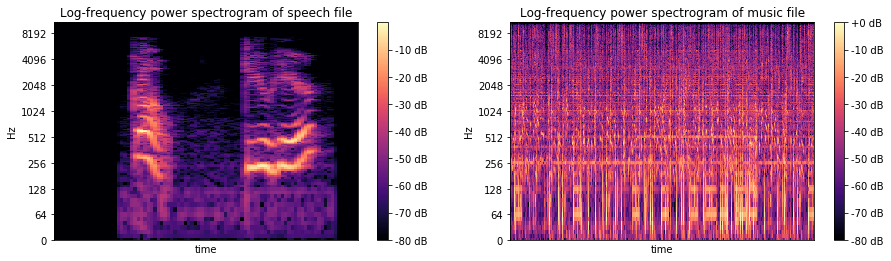

In [7]:
plt.figure(figsize=(15, 4))

Spec_speech = librosa.amplitude_to_db(np.abs(librosa.stft(y_speech)), ref=np.max)
plt.subplot(1,2,1)
librosa.display.specshow(Spec_speech, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram of speech file');
plt.xlabel('time');

Spec_music = librosa.amplitude_to_db(np.abs(librosa.stft(y_music)), ref=np.max)
plt.subplot(1,2,2)
librosa.display.specshow(Spec_music, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram of music file');
plt.xlabel('time');

### Zero-Crossing Rate 


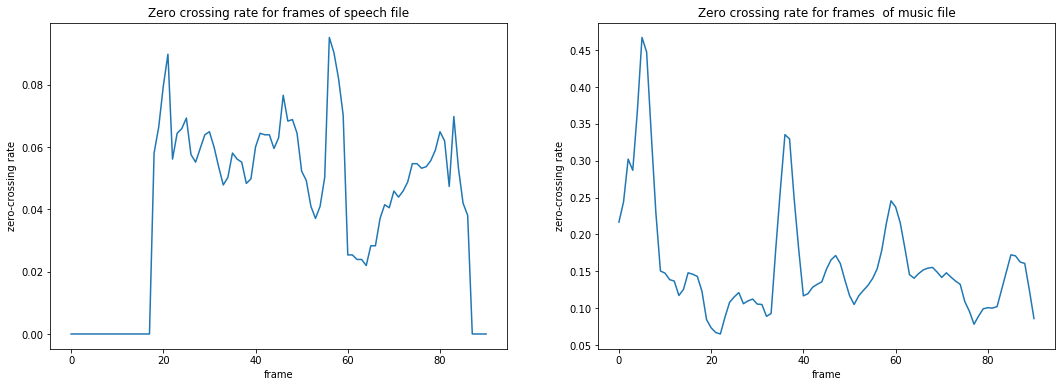

In [8]:
plt.figure(figsize=(18, 6))

speech_crossrate = librosa.feature.zero_crossing_rate(y_speech)
music_crossrate  = librosa.feature.zero_crossing_rate(y_music[0:y_speech.shape[0]])

plt.subplot(1,2,1)
plt.plot(speech_crossrate[0]);
plt.title('Zero crossing rate for frames of speech file');
plt.xlabel('frame');
plt.ylabel('zero-crossing rate');

plt.subplot(1,2,2)
plt.plot(music_crossrate[0]);
plt.title('Zero crossing rate for frames  of music file');
plt.xlabel('frame');
plt.ylabel('zero-crossing rate');


#### Variance of Zero Crossing Rate

In [9]:
print('Variance of speech file: ', np.var(librosa.feature.zero_crossing_rate(y_speech)))
print('Variance of music file: ',np.var(librosa.feature.zero_crossing_rate(y_music)[0:y_speech.shape[0]]))

Variance of speech file:  0.0007353815936247605
Variance of music file:  0.008820549447306125


The variance of the zero-crossing rate for the music file is an order of magnitude higher than for the speech file

### FFT

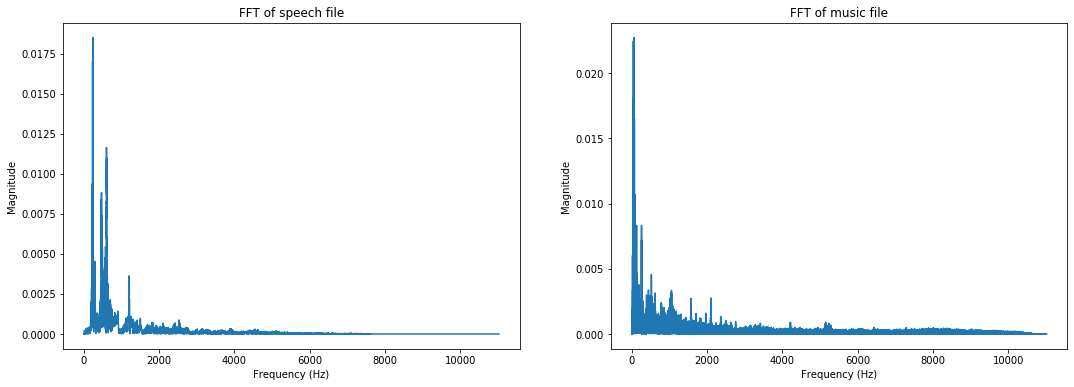

In [10]:

# Number of samplepoints
N_music = int(y_music.shape[0])
N_speech = int(y_speech.shape[0])
# sample spacing
T_music = 1.0 / sr_music
T_speech = 1.0 / sr_speech

speech_fft = scipy.fftpack.fft(y_speech)
music_fft = scipy.fftpack.fft(y_music)

speech_freqs = np.linspace(0.0, 1.0/(2.0*T_speech), int(N_speech/2))

music_freqs = np.linspace(0.0, 1.0/(2.0*T_music), int(N_music/2))

plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.plot(speech_freqs, 2.0/N_speech * np.abs(speech_fft[:N_speech//2]));
plt.title('FFT of speech file')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(1,2,2)
plt.plot(music_freqs, 2.0/N_music * np.abs(music_fft[:N_music//2]));
plt.title('FFT of music file')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');


We can see that the fourier transform introduces many dimensions, but isn't a very unique feature for this application

### MFCC

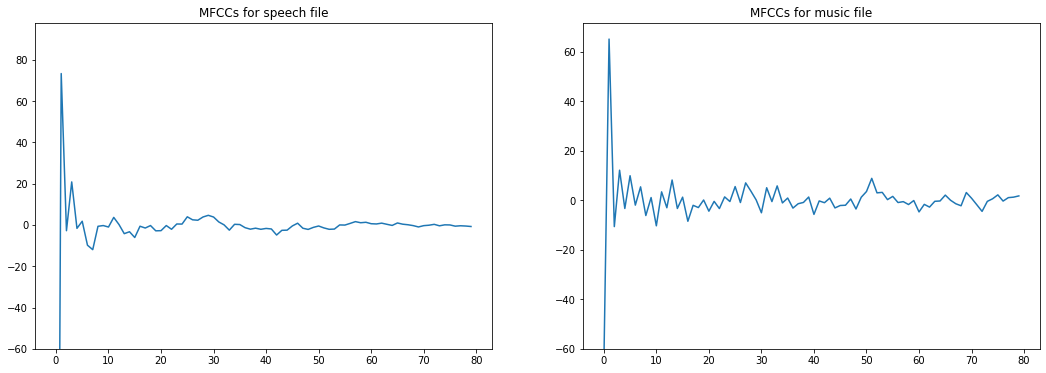

In [11]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
mfccs_speech = np.mean(librosa.feature.mfcc(y=y_speech, sr=sr_speech, n_mfcc=80).T,axis=0) 
plt.plot(mfccs_speech)
plt.title('MFCCs for speech file')
plt.ylim(-60);

plt.subplot(1,2,2)
mfccs_music = np.mean(librosa.feature.mfcc(y=y_music, sr=sr_music, n_mfcc=80).T,axis=0) 
plt.plot(mfccs_music)
plt.title('MFCCs for music file')
plt.ylim(-60);


### Percentage of low energy frames

Text(0, 0.5, 'RMS value')

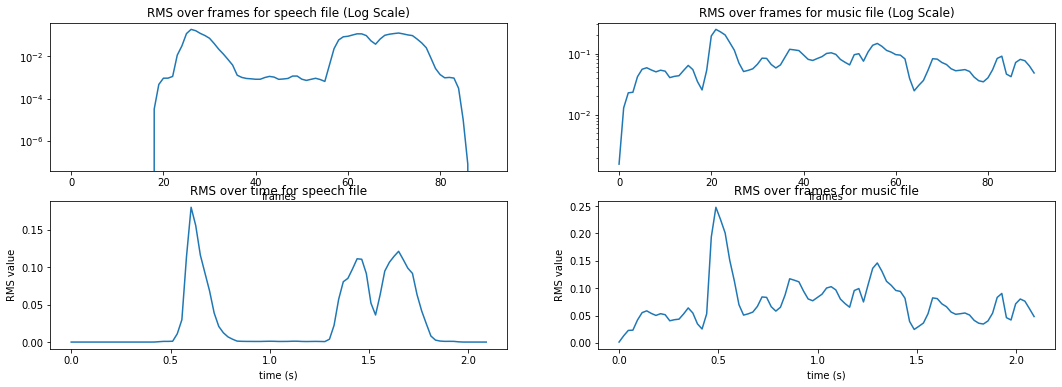

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(2,2,1)
S_speech, phase = librosa.magphase(librosa.stft(y_speech))
rms_speech = librosa.feature.rms(S=S_speech)

plt.semilogy(rms_speech.T, label='RMS speech Energy')

plt.title('RMS over frames for speech file (Log Scale)')
plt.xlabel('frames')
plt.ylabel('')

plt.subplot(2,2,2)
S_music, phase = librosa.magphase(librosa.stft(y_music[0:y_speech.shape[0]]))
rms_music = librosa.feature.rms(S=S_music)

plt.semilogy(rms_music.T, label='RMS music Energy')

plt.title('RMS over frames for music file (Log Scale)')
plt.xlabel('frames')
plt.ylabel('')

plt.subplot(2,2,3)


frames = range(rms_speech.shape[1])
t = librosa.frames_to_time(frames, sr=sr_speech)

plt.plot(t, rms_speech.T);

plt.title('RMS over time for speech file')
plt.xlabel('time (s)')
plt.ylabel('RMS value')

plt.subplot(2,2,4)

frames = range(rms_speech.shape[1])
t = librosa.frames_to_time(frames, sr=sr_music)

plt.plot(t, rms_music.T);

plt.title('RMS over frames for music file')
plt.xlabel('time (s)')
plt.ylabel('RMS value')

We can see that the music file has a much higher percentage of higher energy frames

In [13]:
print('mean energy in music', np.mean(rms_music))
print('mean energy in speech', np.mean(rms_speech))

print('music clearly has a higher mean energy, as expected\n')


low_e_frames_music = [x for x in rms_music.T if x < np.mean(rms_music)*0.5]

print('percentage of frames below 50% of mean in music', 100 * len(low_e_frames_music) / rms_music.shape[1], '\n')

low_e_frames_speech = [x for x in rms_speech.T if x < np.mean(rms_speech)*0.5]

print('percentage of frames below 50% of mean in speech', 100 * len(low_e_frames_speech) / rms_speech.shape[1])

mean energy in music 0.07505011146965117
mean energy in speech 0.02820217287489578
music clearly has a higher mean energy, as expected

percentage of frames below 50% of mean in music 12.087912087912088 

percentage of frames below 50% of mean in speech 67.03296703296704


## Extracting features from all sound files

In [14]:
from os import listdir
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

speech_directory_1 = './Speech_1/'
speech_directory_2 = './Speech_2/recordings/'
speech_directory_3 = './Speech_3/'

speech_files_1 = [speech_directory_1 + filename for filename in listdir(speech_directory_1)]
speech_files_2 = [speech_directory_2 + filename for filename in listdir(speech_directory_2)]
# speech_files_3 = [filename for filename in [listdir(dir) for dir in listdir(speech_directory_3)]]

music_directory_1 = './Music_1/'

music_files_1 = [music_directory_1 + filename for filename in listdir(music_directory_1)]


music_files = shuffle(np.array(music_files_1))
speech_files = shuffle(np.array(speech_files_1 + speech_files_2))

In [15]:
print(len(music_files))
print(len(speech_files))

5675
4703


#### Extract MFCCs from every file

In [16]:
total_set_size = 9400

In [ ]:
%%time
all_features = []  # ANN input vectors, each training example is a 40 input MFCC
all_labels = []    # labels, binary, where 0 represents a music file and 1 represents a speech file

for filename in music_files[0:int(total_set_size/2)]:
    y_music, sr_music = librosa.load(filename)
    mfccs_music = np.mean(librosa.feature.mfcc(y=y_music, sr=sr_music, n_mfcc=80).T,axis=0)
    all_features.append(mfccs_music)

for filename in speech_files[0:int(total_set_size/2)]:
    y_speech, sr_speech = librosa.load(filename)
    mfccs_speech = np.mean(librosa.feature.mfcc(y=y_speech, sr=sr_speech, n_mfcc=80).T,axis=0)
    all_features.append(mfccs_speech)


#### Create Label vector, since the first half of `all_features` is only music features, we make the first half of `all_labels` 0s

In [18]:
all_labels = [0 if i<int((total_set_size)/2) else 1 for i in range(len(all_features))]

X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.5, random_state=42)

In [19]:

clf = MLPClassifier(hidden_layer_sizes=(80, 80, 80), random_state=1)

print("fitting data")
clf.fit(X_train, y_train)

# print("predicting")

# print("Weights")
# [coef.shape for coef in clf.coefs_]

# print("prediction probability")
# print(clf.predict_proba([[0.9, 0.1], [1.1, 0.9], [0.2, 0.1], [0.1, 1.]]))

clf.score(X_test, y_test)


fitting data


0.98

#### Get accuracy of predictions for each class

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#The diagonal entries are the accuracies of each class
print('The model has a ', cm.diagonal()[0]*100,'% accuracy when predicting sound files as music \nand a ',cm.diagonal()[1]*100, '% accuracy when predicting sound as speech')

The model has a  96.66666666666667 % accuracy when predicting sound files as music 
and a  100.0 % accuracy when predicting sound as speech


## Testing on a different dataset

The following file contains noise

In [21]:
y_speech_test, sr_speech_test = librosa.load('0_jackson_0.wav')
ipd.Audio(y_speech_test,rate = sr_speech_test)


When testing on a noisy speech file, our model incorrectly predicts it as a music file

In [22]:
clf.predict(np.mean(librosa.feature.mfcc(y=y_speech_test, sr=sr_speech_test, n_mfcc=80).T,axis=0).reshape(1, 80))

array([0])

Plotting the MFCCs for the noisy file, and one of the speech files from our initial dataset, we can see that the noise does affect the plot enough for it to think it's a music file

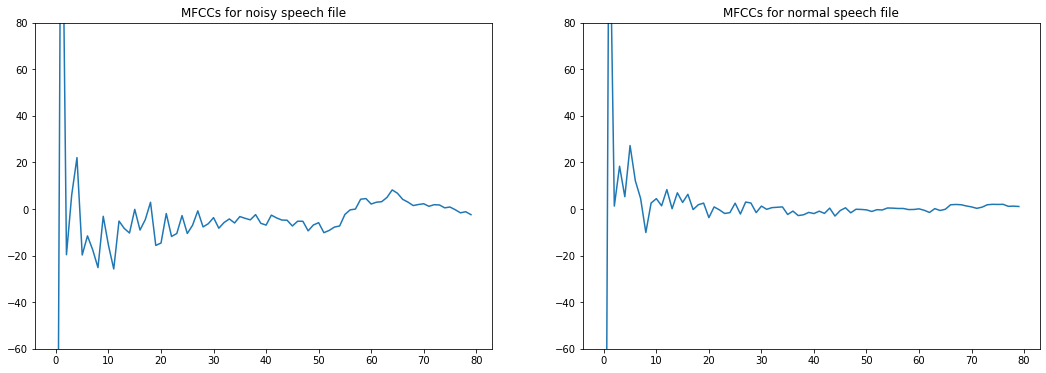

In [23]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.plot(np.mean(librosa.feature.mfcc(y=y_speech_test, sr=sr_speech_test, n_mfcc=80).T,axis=0).reshape(1, 80)[0])
plt.title('MFCCs for noisy speech file')
plt.ylim(-60, 80);

plt.subplot(1,2,2)
plt.plot(mfccs_speech)
plt.title('MFCCs for normal speech file')
plt.ylim(-60, 80);

#### Testing on a different dataset

In [24]:
all_speech_test_files = listdir('./free-spoken-digit-dataset/recordings/')

all_speech_test_files = shuffle(np.array(all_speech_test_files))

all_test_features = []  # ANN input vectors, each training example is a 40 input MFCC
all_test_labels = []    # labels, binary, where 0 represents a music file and 1 represents a speech file

total_set_size = 2000

for filename in all_speech_test_files[0:int(total_set_size/2)]:
    y_music, sr_music = librosa.load('./free-spoken-digit-dataset/recordings/' + filename)
    mfccs_music = np.mean(librosa.feature.mfcc(y=y_music, sr=sr_music, n_mfcc=80).T,axis=0)
    all_test_features.append(mfccs_music)

In [32]:
all_test_labels = [1 for i in range(len(all_test_features))]

clf.score(all_test_features, all_test_labels)

X_train, X_test, y_train, y_test = train_test_split(all_test_features, all_test_labels, test_size=0.5, random_state=42)

In [33]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80, 80, 80), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
clf.score(X_test,y_test)


1.0

In [35]:
print(all_test_features[0:2])

[array([-4.9223483e+02,  2.3898051e+02, -6.1659336e+01,  2.4848258e+00,
        5.6324024e+00, -5.5513737e+01,  1.5526605e+01,  1.1980651e+01,
       -4.1804588e+01,  5.8987870e+00,  1.4339375e+01, -2.1048986e+01,
        1.1089518e+00,  3.2435076e+00, -1.6414970e+01, -6.2941852e+00,
       -9.4397621e+00, -1.2692833e+01, -2.1439517e+00, -1.0908920e+01,
       -1.1796702e+01, -3.4907601e+00, -1.0878803e+01, -5.6607909e+00,
        8.1975985e-01, -9.6300001e+00, -4.4072528e+00,  1.4086243e+00,
       -9.1729412e+00, -5.9128499e+00, -3.2339570e-01, -6.6952233e+00,
       -4.9928546e+00, -2.3048313e+00, -1.8433632e+00,  7.1386414e+00,
        1.0412305e+01,  6.6157012e+00,  5.9449539e+00,  2.1820307e+00,
       -6.0793620e-01,  7.8345388e-01, -5.8241773e-01,  3.5874620e-01,
        1.4125485e+00, -3.7120931e+00, -4.9478273e+00, -9.0794539e-01,
        1.1219575e+00,  1.4855710e+00, -8.3621073e-01, -2.9305580e+00,
       -1.4189396e+00, -1.0987707e+00, -9.0598822e-01,  2.5049090e-02,
     

### Training on more data

By training on a different dataset we hope to increase the accuracy with which the classifier can predict